# Iris Flower Classification

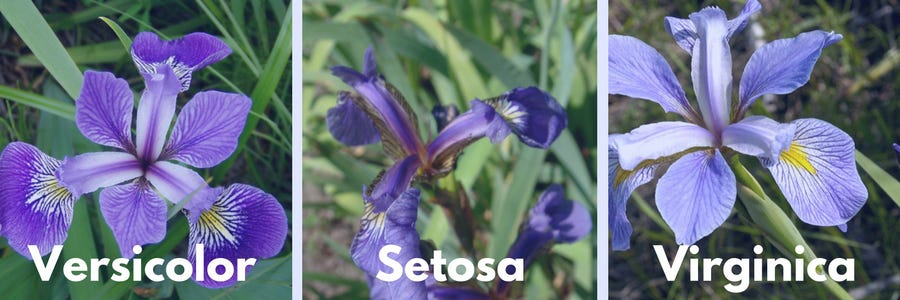

# Iris Data Classification

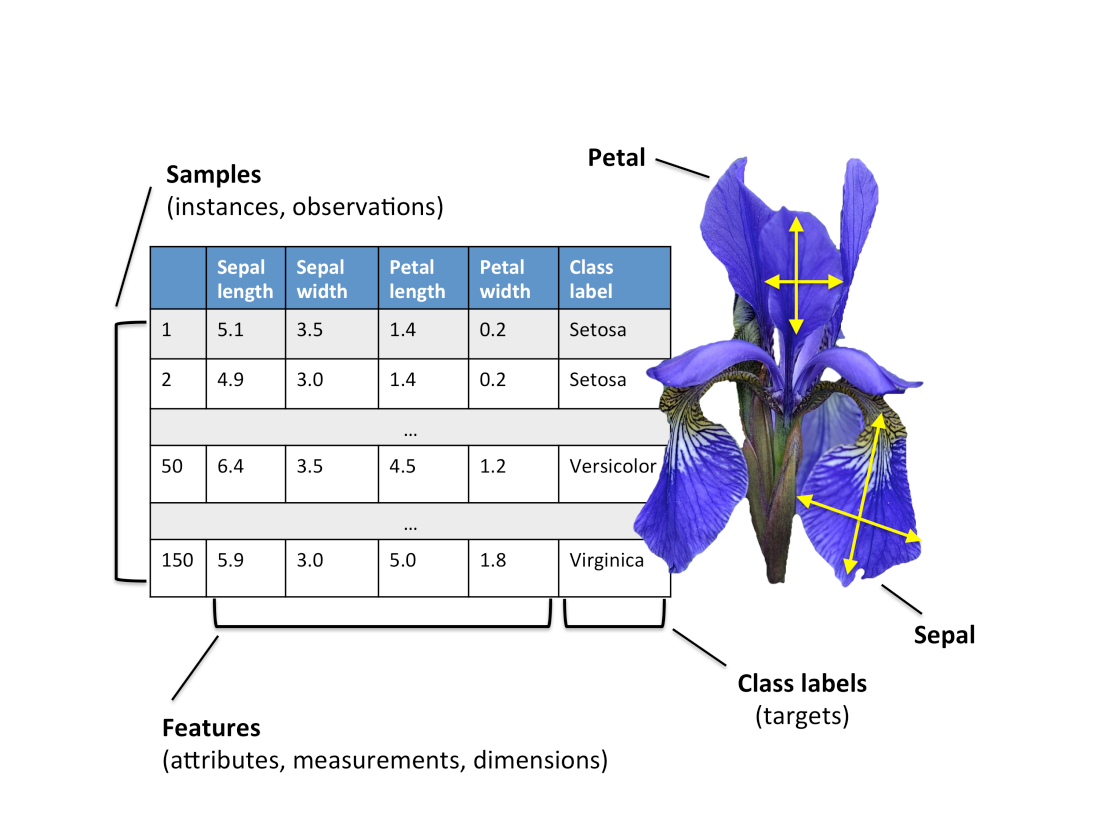

# Importing Libraries

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid", font_scale=1.5)
import plotly.express as px
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load Iris Dataset

In [297]:
iris = pd.read_csv("E:\Infobyte\Task-1 Iris/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [298]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [299]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [300]:
iris.shape

(150, 6)

In [301]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [302]:
data=iris.groupby('Species')

In [303]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor


In [304]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [261]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [262]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [263]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [264]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [265]:
iris.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Data Visualization

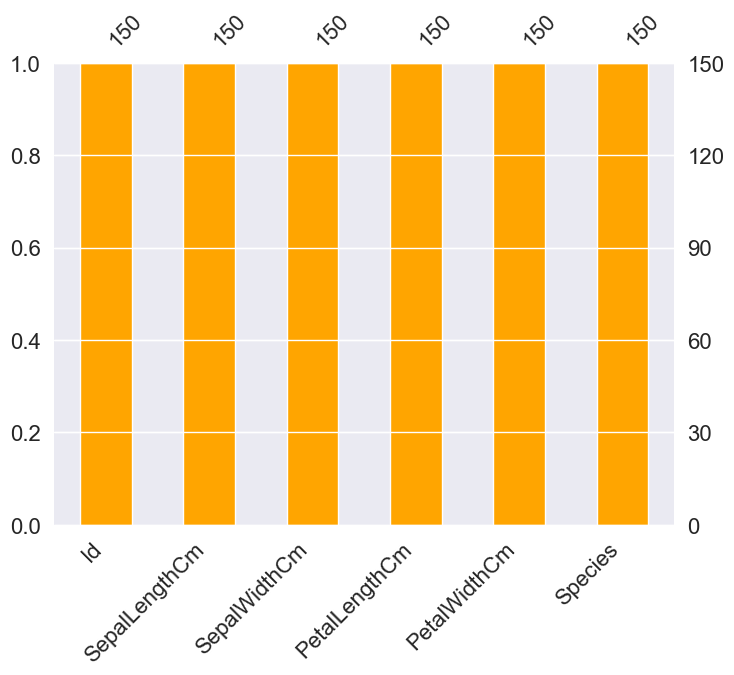

In [266]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='orange')
plt.show()

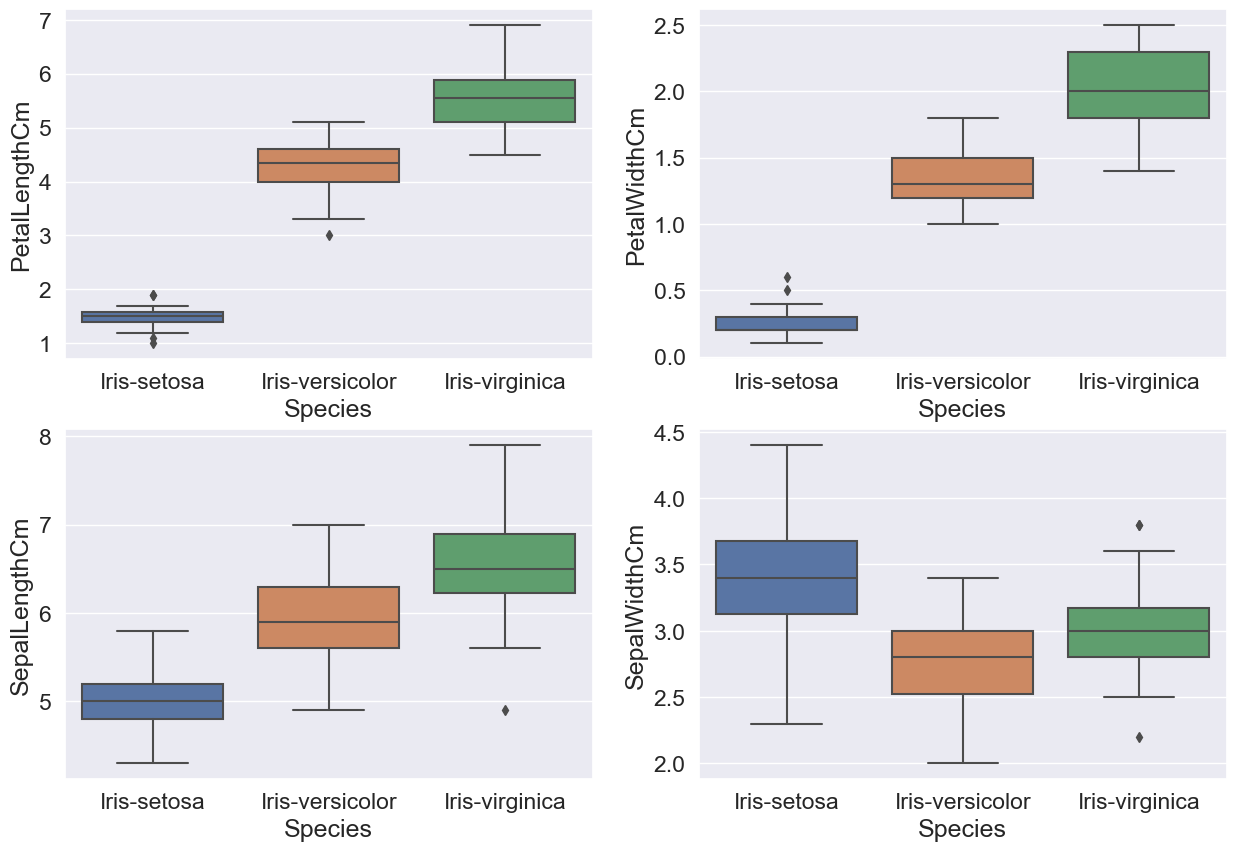

In [267]:
plt.figure(figsize=(15,10)) 
plt.subplot(2,2,1)
sns.boxplot (x='Species',y='PetalLengthCm',data=iris) 
plt.subplot(2,2,2)
sns.boxplot (x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot (x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot (x='Species',y='SepalWidthCm',data=iris)
plt.show()

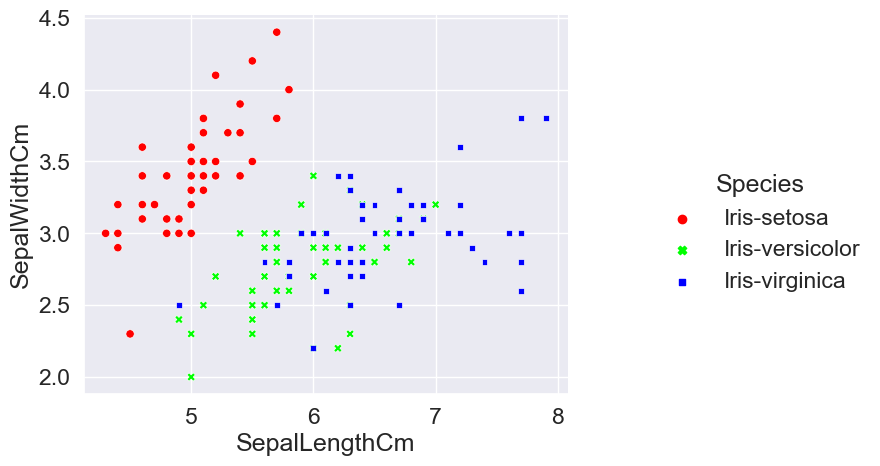

In [243]:
custom_palette = ['red', 'lime', 'blue']
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species',palette=custom_palette)
g.fig.set_size_inches(10,5)
plt.show()

Text(0.5, 0, 'size')

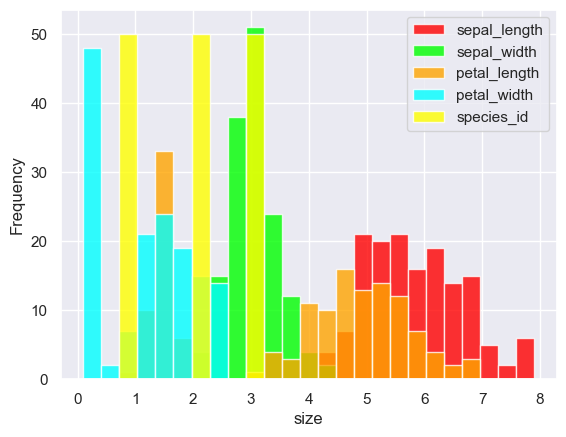

In [294]:
custom_color = ['red', 'lime', 'orange', 'cyan', 'yellow']
sns.set_context('notebook')
ax=iris.plot.hist(bins=25,alpha=0.8, color=custom_color)
ax.set_xlabel('size')

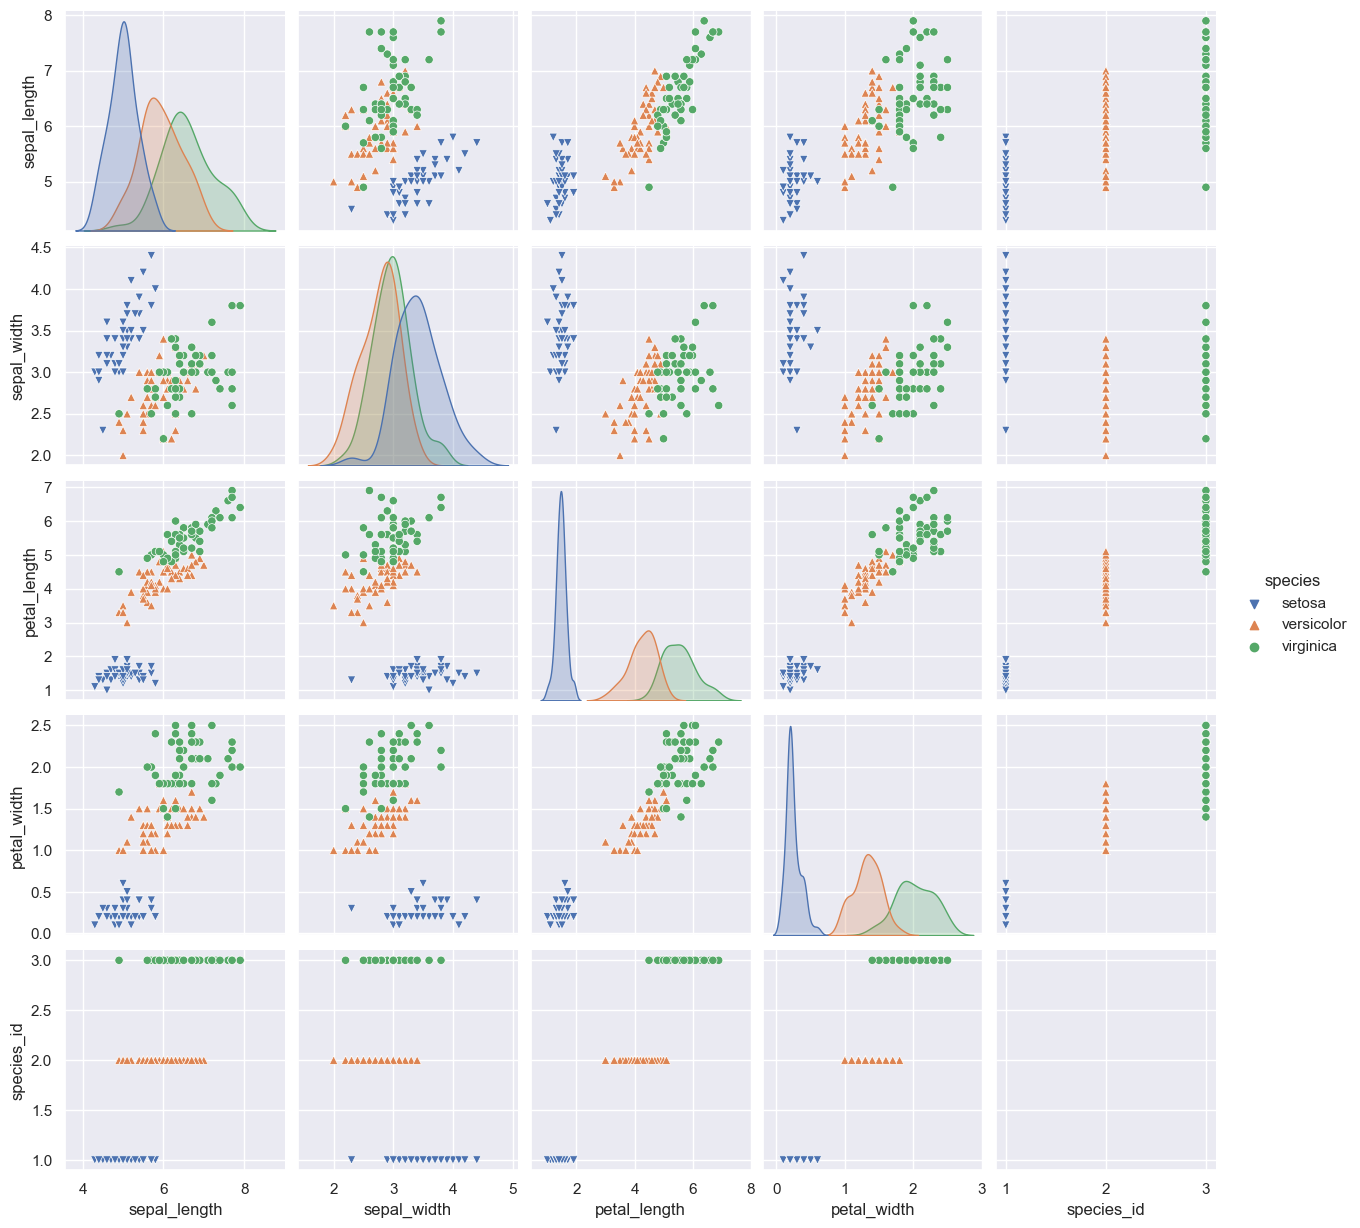

In [214]:
custom_markers = ['v', '^', 'o']
sns.pairplot(iris,hue="species", markers = custom_markers)
plt.show()

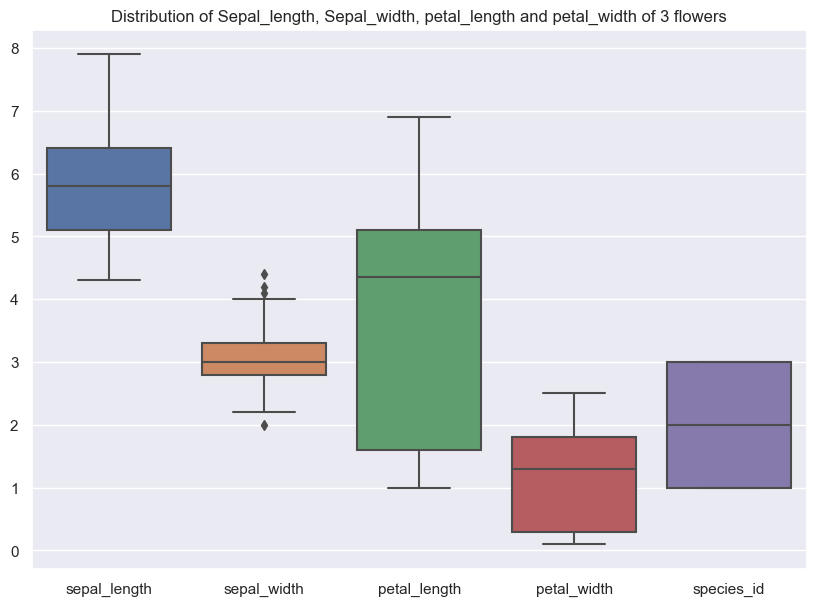

In [215]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

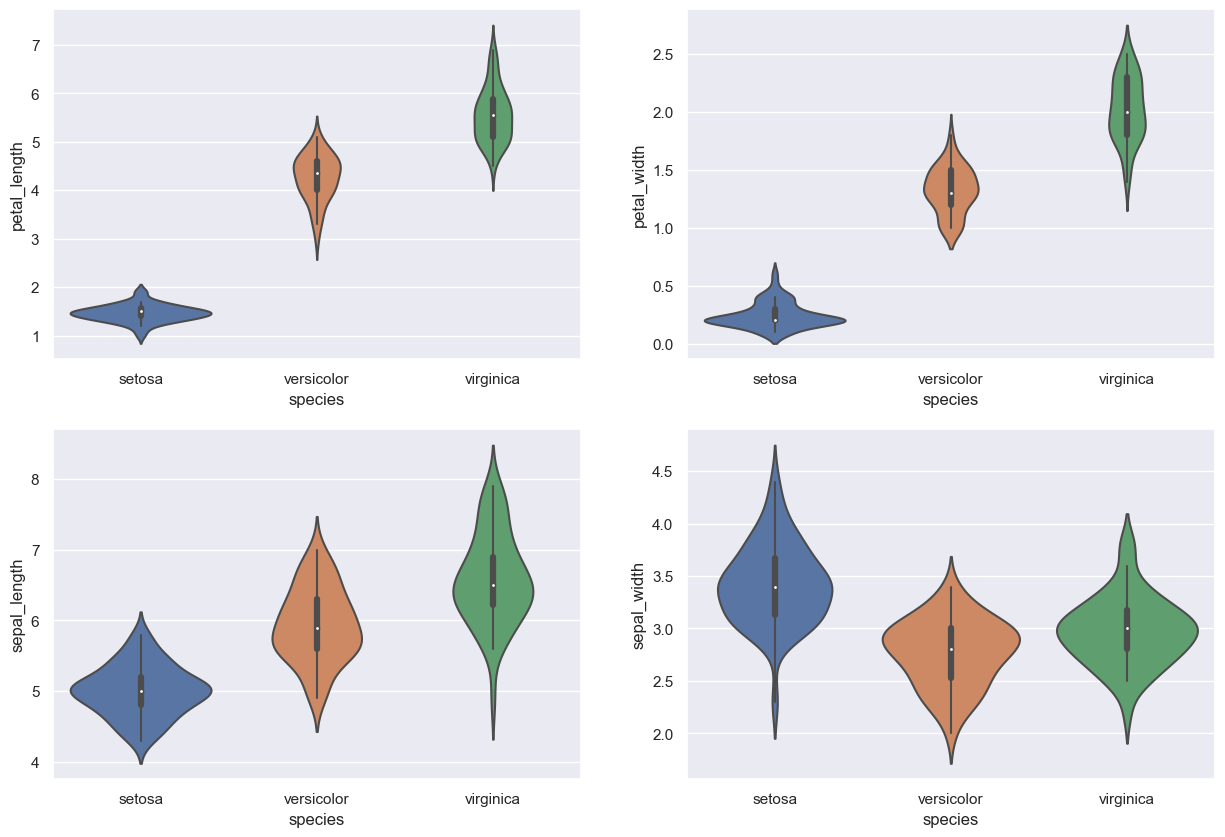

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot (x='species',y='sepal_width', data=iris)
plt.show()

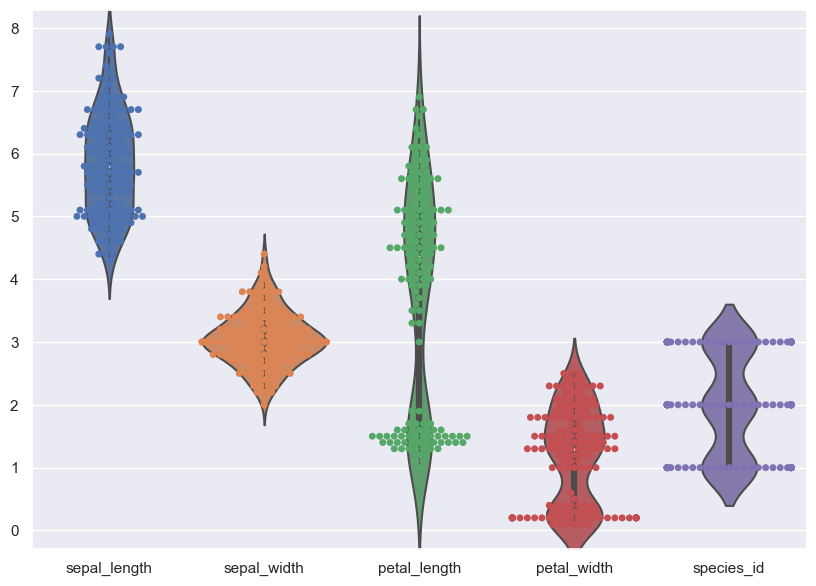

In [35]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot(data=iris)
plt.show()

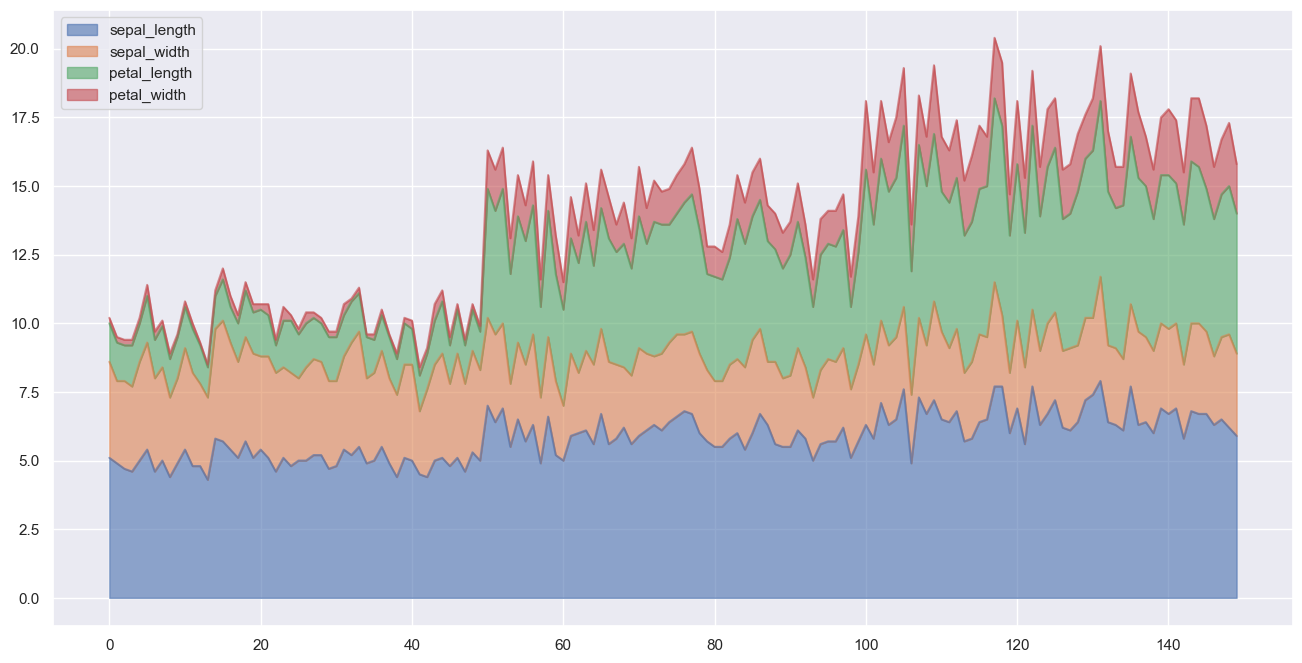

In [36]:
iris.plot.area(y=['sepal_length','sepal_width','petal_length','petal_width'], alpha = 0.6, figsize = (16,8));

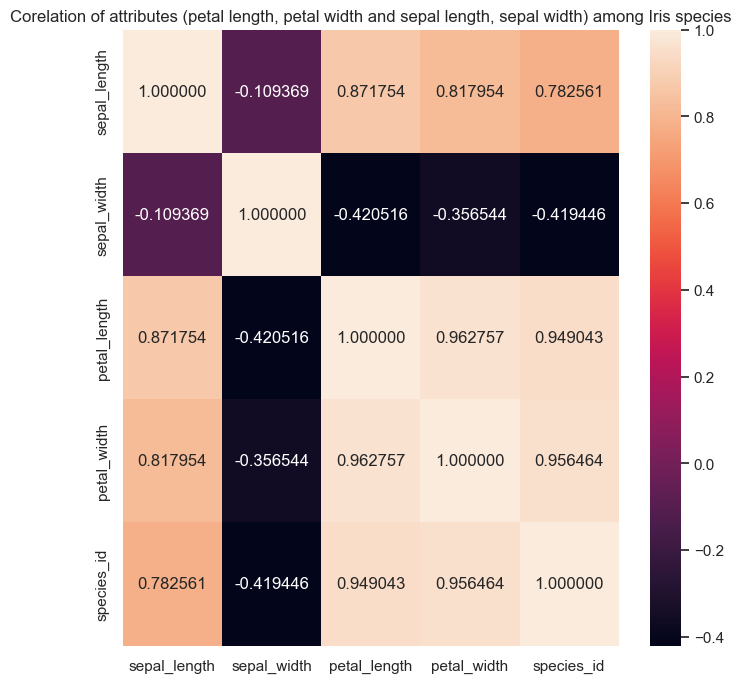

In [37]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True, fmt="f").set_title("Corelation of attributes (petal length, petal width and sepal length, sepal width) among Iris species")
plt.show()

# Model Building

#### We'll evaluate these 6 algorithms:

Logistic Regression (LR)  
Linear Discriminate Analysis (LDA)  
K-Nearest Neighbours (KNN)  
Classification and Regression Trees (CRT)   
Guassian Naive Bayes (GNN)    
Support Vector Machine (SVM)

### Splitting the Dataset into Training and Testing

In [58]:
X = iris.drop(['Species'], axis=1)
Y = iris['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=25)

### Checking the Dimensions of Training and Testing Data

In [59]:
print("X_Train Shape:", X_train.shape)
print("X_Test Shape:", X_test.shape)
print("Y_Train Shape:", Y_train.shape)
print("Y_Test Shape:", Y_test.shape)

X_Train Shape: (112, 5)
X_Test Shape: (38, 5)
Y_Train Shape: (112,)
Y_Test Shape: (38,)


### Creating Model

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [61]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CRT', DecisionTreeClassifier()))
models.append(('GNN', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))

In [63]:
from sklearn.model_selection import KFold, cross_val_score

print("Model Accuracy")

names = []
accuracy = []
for name, model in models:
    
    kfold = KFold(n_splits=15)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: Accuracy = %f" % (name, cv_results.mean())
    print(msg)

Model Accuracy
LR: Accuracy = 0.990476
LDA: Accuracy = 1.000000
KNN: Accuracy = 1.000000
CRT: Accuracy = 0.990476
GNN: Accuracy = 0.990476
SVM: Accuracy = 0.991667
RF: Accuracy = 1.000000


## Dimentionality Reduction

### Extra Trees Classifier (ETC)

In [72]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 53)

X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
model.fit(X, y)

ETC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ETC']).sort_values('ETC', ascending=False)

model = None

ETC_feature_importances

,ETC
PetalWidthCm,0.313536
PetalLengthCm,0.303102
Id,0.289056
SepalLengthCm,0.062022
SepalWidthCm,0.032284


### Random Forest Classifier (RFC)

In [73]:
model = RandomForestClassifier(random_state = 53)

model.fit(X, y)
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['RFC']).sort_values('RFC', ascending=False)

model = None

RFC_feature_importances

,RFC
Id,0.411434
PetalWidthCm,0.288976
PetalLengthCm,0.239959
SepalLengthCm,0.053677
SepalWidthCm,0.005954


### AdaBoost Classifier (ADBC)

In [74]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state = 53)

model.fit(X, y)

ADB_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['ADB']).sort_values('ADB', ascending=False)

model = None

ADB_feature_importances

,ADB
Id,0.72
PetalWidthCm,0.18
PetalLengthCm,0.10
SepalLengthCm,0.00
SepalWidthCm,0.00


### Gradient Boosting Classifier (GBC)

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 53)

model.fit(X, y)
GBC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['GBC']).sort_values('GBC', ascending=False)

model = None

GBC_feature_importances.head(10)

,GBC
Id,7.855103e-01
PetalWidthCm,1.783356e-01
PetalLengthCm,3.615404e-02
SepalLengthCm,1.108219e-16
SepalWidthCm,9.056792e-18


### K - NN Classifier

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 7)
knn.fit(X_train, Y_train)
print("K-Nearest Neighbors classifier is successfully implemented")
y_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, y_pred) 
print("Confusion Matrix:- ") 
print(cm)

accuracy = accuracy_score (Y_test,y_pred)
print("accuracy:- ", accuracy*100)
print("Classification Report:-")
print(classification_report(Y_test, y_pred))

K-Nearest Neighbors classifier is successfully implemented
Confusion Matrix:- 
[[11  0  0]
 [ 0 16  0]
 [ 0  0 11]]
accuracy:-  100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



### Decision Tree

In [112]:
dtree = DecisionTreeClassifier()

dtree.fit(X_train, Y_train)
print("Decision Tree Algorithm is successfully implimented.")

y_pred = dtree.predict(X_test)

cm = confusion_matrix(Y_test, y_pred) 
print("Confusion Matrix:- ")
print(cm)

accuracy = accuracy_score(Y_test,y_pred)

print("accuracy:-", accuracy*100)
print("Classification Report:-")
print( classification_report (Y_test, y_pred))

Decision Tree Algorithm is successfully implimented.
Confusion Matrix:- 
[[11  0  0]
 [ 0 16  0]
 [ 0  0 11]]
accuracy:- 100.0
Classification Report:-
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [115]:
from sklearn.tree import plot_tree

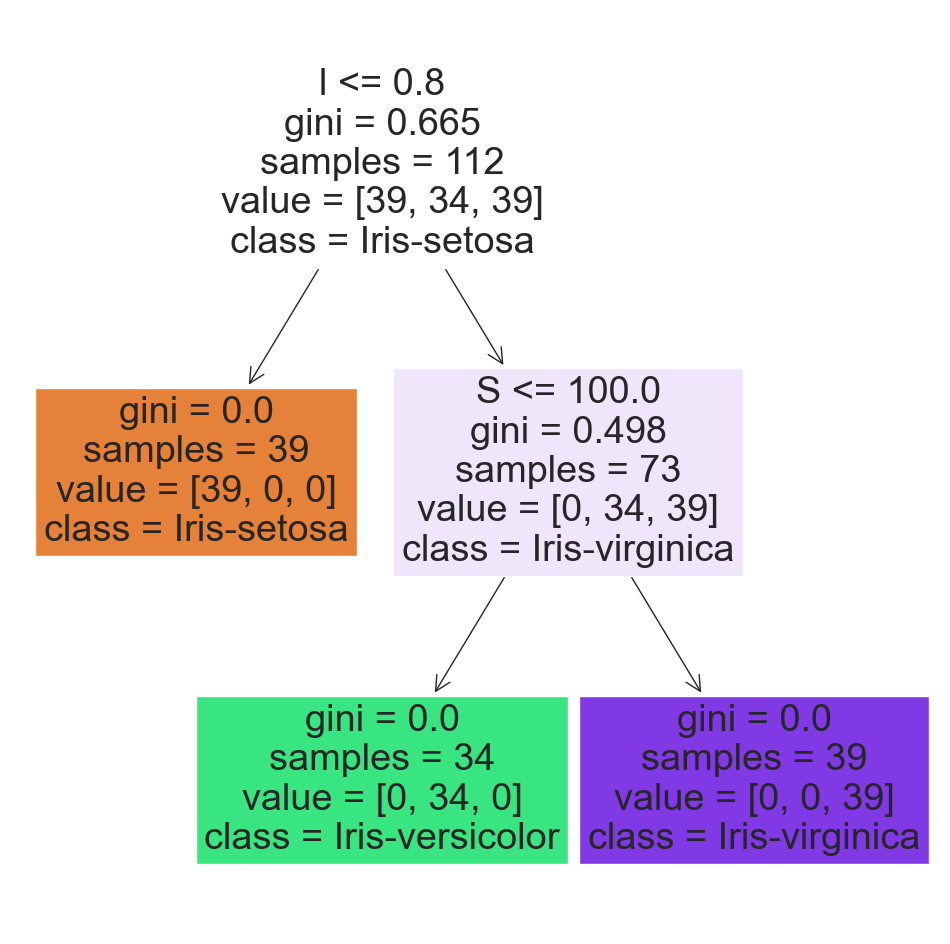

In [150]:
feature = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plt.figure(figsize=(12,12))
plot_tree(dtree, feature_names = feature[0], class_names = classes, filled=True);

# Testing Models

In [151]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear', multi_class = "auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma = "auto")))


def test_model(model):
    
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    
    print("Accuracy:", accuracy_score(Y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, predictions))
    print("Classification Report:")
    print(classification_report(Y_test, predictions))

In [153]:
# Predicting the Values
for name, model in models:
    print("Testing:", name)
    test_model(model)

Testing: LR
Accuracy: 0.9210526315789473
Confusion Matrix:
[[11  0  0]
 [ 0 13  3]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.81      0.90        16
 Iris-virginica       0.79      1.00      0.88        11

       accuracy                           0.92        38
      macro avg       0.93      0.94      0.93        38
   weighted avg       0.94      0.92      0.92        38

Testing: LDA
Accuracy: 1.0
Confusion Matrix:
[[11  0  0]
 [ 0 16  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00    

### Model Testing

In [166]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lda =  DecisionTreeClassifier()

lda.fit(X_train, Y_train)

predict = lda.predict(X_test)

print("\033[1mAccuracy\033[0m")
print(accuracy_score(Y_test, predict))
print("\033[1mConfusion Matrix\033[0m")
print(confusion_matrix(Y_test, predict))
print("\033[1mClassification Report\033[0m")
print(classification_report(Y_test, predict))

lda = None

Accuracy
1.0
Confusion Matrix
[[11  0  0]
 [ 0 16  0]
 [ 0  0 11]]
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



# Saving Models

In [158]:
import pickle
for name, model in models:
    filename = name + ".pkl"
    pickle.dump(model, open(filename, 'wb'))
print("Saved all Models")

Saved all Models


###### END